- define starting node
- run spreading model
- plot result
    

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sir_classical_spreading import sir_classical_spreading


In [2]:
G = nx.read_edgelist('M1/edges.csv', delimiter = ',')

In [22]:
# Specify the number of random nodes you want
num_random_nodes = 10  # You can change this number as needed

#select one raqndom node:
random_node = random.choice([i for i in range(G.number_of_nodes())])

# Select multiple random nodes
random_nodes = random.sample(G.nodes(), num_random_nodes)

random_nodes

/var/folders/49/1k50p6kj6d173t0f0hl4h0700000gn/T/ipykernel_3798/1000581025.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G.nodes(), num_random_nodes)


['1060', '595', '1305', '1206', '459', '962', '1315', '347', '427', '233']

In [4]:
# Modified SI function using threshold
def new_infected_threshold(G, I, kappa, t):
    '''SI function which uses thresholds to determine which new 
    nodes are infected by their neighbours in one step of the infection process.
    
    Args:
        G (nx.Graph): Graph to perform algorithm on
        I (set): Set of already infected nodes
        kappa (int): Threshold
        t (int): Time step of current infection step

    Return:
        new_infected (set): Set of newly infected nodes.
    '''

    # Create a new set of the newly infected nodes
    new_infected = set()

    # Check if time step t is 1 and set threshold to 1 if true
    if t == 1:
        kappa = 1

    # Iterate over all nodes in the network which are not already infected
    for u in set(G.nodes) - I:

        # Check if the amount of infected neighbors passes the threshold
        if len(set(G.neighbors(u)) & I) >= kappa:
            new_infected.add(u)

    return new_infected

In [5]:
def get_starting_nodes(G, method):  
    if method == 'degree':
        # Calculate degree centrality
        node_dict = nx.degree_centrality(G)
    
    elif method  == 'closeness':
        node_dict = nx.closeness_centrality(G)

    elif method == 'betweenness':
        node_dict = nx.betweenness_centrality(G)
    
    elif method  == 'eigenvector':
        node_dict = nx.eigenvector_centrality(G)
    
    elif method == 'katz':
        node_dict = nx.katz_centrality(G)
    
    elif method == 'harmonic':
        node_dict = nx.harmonic_centrality(G)
    
    # Sort the dictionary items in descending order based on centrality values
    sorted_nodes = sorted(node_dict.items(), key=lambda x: x[1], reverse=True)
        
    top_10 = sorted_nodes[:10]
        
    # Extract only the node IDs from the sorted list
    top_10_node_ids = [node for node, _ in top_10]


    # Display the node IDs
    #print(top_10_node_ids)
    #print(top_10)
    return top_10_node_ids


In [81]:
#dateframes for our different methods
data_random = sir_classical_spreading(G, beta = 0.2, gamma = 3,starting_nodes=random_nodes )
data_degree = sir_classical_spreading(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'degree') )
data_closeness = sir_classical_spreading(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'closeness') )
data_betweenness = sir_classical_spreading(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'betweenness') )
data_eigenvector = sir_classical_spreading(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'eigenvector') )
data_harmonic = sir_classical_spreading(G, beta = 0.2, gamma = 3,starting_nodes= get_starting_nodes(G, 'harmonic') )


# Create multiple DataFrames
data_frames = [
    data_random,
    data_degree,
    data_closeness,
    data_betweenness,
    data_eigenvector,
    data_harmonic
]



In [88]:
def plot_methods(data_frames):
    
    methods = ['random', 'degree centrality', 'closeness centrality', 'betweenness centrality','data_eigenvector','data_harmonic']
    # Define a custom color palette
    custom_palette = ['green', 'hotpink','blue','orange','red', 'black']  # Add more colors if needed
    # Create a graph with the different df's
    for i, df_data in enumerate(data_frames):
        sns.lineplot(data = df_data, x='t', y='IR', label=f'Method {methods[i]}', color = custom_palette[i])   


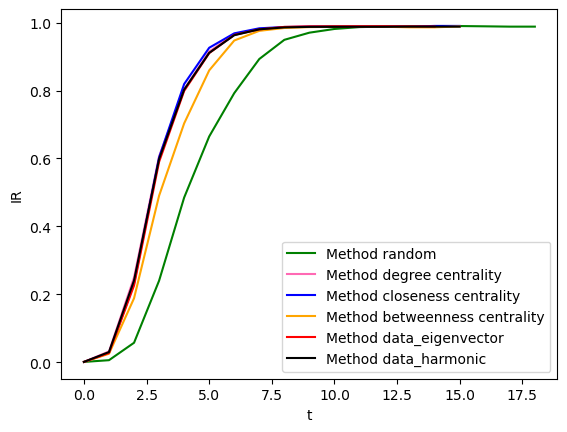

In [89]:
plot_methods(data_frames)
